#  Mapping Poverty in Los Angeles 
#### ACS census Tract with 5 year Estimate Household Income (In 2021 Inflation Adjusted Dollars) 

In [69]:
import pandas as pd
import geopandas as gpd

In [70]:
# Importing the data 
df=pd.read_csv('data/R13291723_SL140.csv')

#### Looking at the dimensions of the data 

In [71]:
df.shape

(2498, 88)

#### Lets see how the data looks like 

In [72]:
df.head

<bound method NDFrame.head of         Geo_FIPS                                          Geo_QName  \
0     6037101110  Census Tract 1011.10, Los Angeles County, Cali...   
1     6037101122  Census Tract 1011.22, Los Angeles County, Cali...   
2     6037101220  Census Tract 1012.20, Los Angeles County, Cali...   
3     6037101221  Census Tract 1012.21, Los Angeles County, Cali...   
4     6037101222  Census Tract 1012.22, Los Angeles County, Cali...   
5     6037101300  Census Tract 1013, Los Angeles County, California   
6     6037101400  Census Tract 1014, Los Angeles County, California   
7     6037102103  Census Tract 1021.03, Los Angeles County, Cali...   
8     6037102104  Census Tract 1021.04, Los Angeles County, Cali...   
9     6037102105  Census Tract 1021.05, Los Angeles County, Cali...   
10    6037102107  Census Tract 1021.07, Los Angeles County, Cali...   
11    6037103101  Census Tract 1031.01, Los Angeles County, Cali...   
12    6037103102  Census Tract 1031.02, Los Ang

#### The data has alot of information lets look at the sample data 

In [73]:
df.sample()

Geo_FIPS                                          Geo_QName  \
1975  6037571800  Census Tract 5718, Los Angeles County, California   

     Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
1975      ACSSF         ca         140            0          6175     NaN   

      Geo_REGION  Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  \
1975         NaN           NaN          NaN          6          37   

      Geo_COUSUB  Geo_PLACE  Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  \
1975         NaN        NaN     571800         NaN         NaN         NaN   

      Geo_AIANHHFP  Geo_AIHHTLI  Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  \
1975           NaN          NaN         NaN       NaN       NaN       NaN   

      Geo_CSA  Geo_METDIV  Geo_MACC  Geo_MEMI  Geo_NECTA  Geo_CNECTA  \
1975      NaN         NaN       NaN       NaN        NaN         NaN   

      Geo_NECTADIV  Geo_UA  Geo_UACP  Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  \
1975           NaN     NaN       NaN         NaN       NaN       NaN      NaN   

      Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  Geo_SDELM  Geo_SDSEC  Geo_SDUNI  \
1975        NaN        NaN         NaN        NaN        NaN        NaN   

      Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  Geo_PUMA5  Geo_PUMA1  \
1975     NaN      NaN      NaN      NaN        NaN        NaN   

               Geo_GEOID           Geo_NAME  Geo_BTTR  Geo_BTBG  Geo_PLACESE  \
1975  14000US06037571800  Census Tract 5718       NaN       NaN          NaN   

      SE_A14001_001  SE_A14001_002  SE_A14001_003  SE_A14001_004  \
1975           1272             19              0              8   

      SE_A14001_005  SE_A14001_006  SE_A14001_007  SE_A14001_008  \
1975             39              8             52             38   

      SE_A14001_009  SE_A14001_010  SE_A14001_011  SE_A14001_012  \
1975             14             15            111            101   

      SE_A14001_013  SE_A14001_014  SE_A14001_015  SE_A14001_016  \
1975            153            130             30            110   

      SE_A14001_017  PCT_SE_A14001_002  PCT_SE_A14001_003  PCT_SE_A14001_004  \
1975            444               1.49                0.0               0.63   

      PCT_SE_A14001_005  PCT_SE_A14001_006  PCT_SE_A14001_007  \
1975               3.07               0.63               4.09   

      PCT_SE_A14001_008  PCT_SE_A14001_009  PCT_SE_A14001_010  \
1975               2.99                1.1               1.18   

      PCT_SE_A14001_011  PCT_SE_A14001_012  PCT_SE_A14001_013  \
1975               8.73               7.94              12.03   

      PCT_SE_A14001_014  PCT_SE_A14001_015  PCT_SE_A14001_016  \
1975              10.22               2.36               8.65   

      PCT_SE_A14001_017  
1975              34.91

#### Look at the data sample 

In [74]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   int64  
 1   Geo_QName          2498 non-null   object 
 2   Geo_FILEID         2498 non-null   object 
 3   Geo_STUSAB         2498 non-null   object 
 4   Geo_SUMLEV         2498 non-null   int64  
 5   Geo_GEOCOMP        2498 non-null   int64  
 6   Geo_LOGRECNO       2498 non-null   int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          2498 non-null   int64  
 12  Geo_COUNTY         2498 non-null   int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          2498 non-null   int64  
 16  Geo_BLKGRP         0 non

In [75]:
#### Looking at the Geo_FIPS if we have a zero in the front 

In [76]:
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

#### Look at that we dont lets check the the rest for Geo_STATE and Geo_County

In [77]:
df.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [78]:
df.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

#### Lets convert them into String so we wont have an issue

In [137]:
# Have to conver the FIPS code into strings
df = pd.read_csv(
    'data/R13291723_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

#### Lets check if it worked

In [138]:
df.Geo_FIPS.head()

0    06037101110
1    06037101122
2    06037101220
3    06037101221
4    06037101222
Name: Geo_FIPS, dtype: object

### Look at that it worked !

#### Lets see how many empty values have and lets get rid of them because we dont need any data with empty values

In [139]:
# Looking at columns that have all empty values
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

#### Thats alot of empty values lets get rid of them 

In [140]:
# Cleaning the data that have empty values 
df=df.dropna(axis=1,how="all")

#### Lets check if it worked

In [141]:
df.columns[df.isna().all()].tolist()

[]

#### Yes it worked we have zero empty values in our data set

#### Lets run our info and see the full data with values 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_FILEID         2498 non-null   object 
 3   Geo_STUSAB         2498 non-null   object 
 4   Geo_SUMLEV         2498 non-null   int64  
 5   Geo_GEOCOMP        2498 non-null   int64  
 6   Geo_LOGRECNO       2498 non-null   int64  
 7   Geo_STATE          2498 non-null   object 
 8   Geo_COUNTY         2498 non-null   object 
 9   Geo_TRACT          2498 non-null   int64  
 10  Geo_GEOID          2498 non-null   object 
 11  Geo_NAME           2498 non-null   object 
 12  SE_A14001_001      2498 non-null   int64  
 13  SE_A14001_002      2498 non-null   int64  
 14  SE_A14001_003      2498 non-null   int64  
 15  SE_A14001_004      2498 non-null   int64  
 16  SE_A14001_005      2498 

#### Based on out txt file we will only use the Geo_FIPS and SE_A14001_002 to SE_A14001_017 for our columns

In [143]:
df.columns 

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_STATE', 'Geo_COUNTY', 'Geo_TRACT',
       'Geo_GEOID', 'Geo_NAME', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [144]:
# Define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

#### Keeping only these data for our census mapping of poverty in Los Angeles 

#### Making a new data df2 that have the columns to keep 

In [145]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   SE_A14001_002  2498 non-null   int64 
 2   SE_A14001_003  2498 non-null   int64 
 3   SE_A14001_004  2498 non-null   int64 
 4   SE_A14001_005  2498 non-null   int64 
 5   SE_A14001_006  2498 non-null   int64 
 6   SE_A14001_007  2498 non-null   int64 
 7   SE_A14001_008  2498 non-null   int64 
 8   SE_A14001_009  2498 non-null   int64 
 9   SE_A14001_010  2498 non-null   int64 
 10  SE_A14001_011  2498 non-null   int64 
 11  SE_A14001_012  2498 non-null   int64 
 12  SE_A14001_013  2498 non-null   int64 
 13  SE_A14001_014  2498 non-null   int64 
 14  SE_A14001_015  2498 non-null   int64 
 15  SE_A14001_016  2498 non-null   int64 
 16  SE_A14001_017  2498 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 331.9+ KB


#### Will be renaming the columns to its corresponding data labels from the txt file.

In [146]:
# Rename the columns 
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

#### Adding the names for the corresponding labels to make it easier to read and interpret the data instead of numbers and letter code 

In [147]:
df2.columns = ['FIPS',               
'Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

#### Making sure the renaming of the data label worked so lets run df2.head() and see 

In [148]:
# Making sure the data works 
df2.head(10)

FIPS  Less than $10,000  $10,000-$14,999  $15,000-$19,999  \
0  06037101110                 54              126               49   
1  06037101122                 88                0                7   
2  06037101220                 78               82               28   
3  06037101221                 76              107              118   
4  06037101222                161              167               34   
5  06037101300                 68               27               37   
6  06037101400                  7               98               57   
7  06037102103                 24                0               33   
8  06037102104                 54               74               11   
9  06037102105                  5               21               13   

   $20,000-$24,999  $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  \
0               33               61                6               60   
1               42               50               36                0   
2              102                7               86               43   
3              148                0               81              111   
4               41               19              116                0   
5               15               43               44               41   
6              176               29               25               25   
7               40               13              101               46   
8               18               18                0               59   
9                6               45                0               20   

   $40,000-$44,999  $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  \
0               85               43              149              105   
1               13                0               37              200   
2               55               36              189               89   
3               27               97              112               32   
4               86               14               35               44   
5               16               14               40              123   
6               45               63               82               68   
7                0               37               12               59   
8              125               18               40               89   
9               13               21               74               25   

   $75,000-$99,999  $100,000-$124,999  $125,000-$149,999  $150,000-$199,999  \
0              146                210                134                143   
1              158                126                194                168   
2              134                116                 60                140   
3              193                207                 33                108   
4               96                  9                 81                  0   
5              132                188                161                221   
6               92                208                 59                173   
7               46                 39                114                 65   
8              209                185                113                 92   
9              145                 20                 18                 80   

   More than $200,000  
0                  90  
1                 253  
2                 112  
3                   0  
4                  32  
5                 250  
6                  97  
7                  40  
8                 205  
9                  48

#### Lets do some simple stats and calculate the mean for each variable of the column 

In [149]:
# Doing some stats 
df2.mean()

FIPS                         inf
Less than $10,000      72.449960
$10,000-$14,999        57.170536
$15,000-$19,999        44.971978
$20,000-$24,999        48.451561
$25,000-$29,999        47.781025
$30,000-$34,999        48.839872
$35,000-$39,999        46.261809
$40,000-$44,999        46.542834
$45,000-$49,999        41.182946
$50,000-$59,999        86.848679
$60,000-$74,999       118.791033
$75,000-$99,999       166.070456
$100,000-$124,999     130.196157
$125,000-$149,999      95.133307
$150,000-$199,999     119.851481
More than $200,000    167.651321
dtype: float64

#### Was tying to look at the median but i got this weird number output 

In [150]:
df2.median()

FIPS                  6.037403e+09
Less than $10,000     5.600000e+01
$10,000-$14,999       3.950000e+01
$15,000-$19,999       3.500000e+01
$20,000-$24,999       3.800000e+01
$25,000-$29,999       3.900000e+01
$30,000-$34,999       4.000000e+01
$35,000-$39,999       3.800000e+01
$40,000-$44,999       3.700000e+01
$45,000-$49,999       3.300000e+01
$50,000-$59,999       7.500000e+01
$60,000-$74,999       1.080000e+02
$75,000-$99,999       1.520000e+02
$100,000-$124,999     1.160000e+02
$125,000-$149,999     8.100000e+01
$150,000-$199,999     9.800000e+01
More than $200,000    9.300000e+01
dtype: float64

#### Going to check the the describtion of the count, mean ,std, min, 25%,50% that is the median , 75% and max 

In [151]:
df2.describe()

Less than $10,000  $10,000-$14,999  $15,000-$19,999  $20,000-$24,999  \
count        2498.000000      2498.000000      2498.000000      2498.000000   
mean           72.449960        57.170536        44.971978        48.451561   
std            66.418095        61.275108        42.493949        43.369387   
min             0.000000         0.000000         0.000000         0.000000   
25%            27.000000        15.000000        14.000000        16.000000   
50%            56.000000        39.500000        35.000000        38.000000   
75%            97.000000        80.000000        64.000000        68.000000   
max           545.000000       709.000000       366.000000       402.000000   

       $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  $40,000-$44,999  \
count      2498.000000      2498.000000      2498.000000      2498.000000   
mean         47.781025        48.839872        46.261809        46.542834   
std          40.462105        42.166356        40.802447        41.911839   
min           0.000000         0.000000         0.000000         0.000000   
25%          17.000000        17.000000        17.000000        17.000000   
50%          39.000000        40.000000        38.000000        37.000000   
75%          68.000000        69.000000        65.000000        64.000000   
max         359.000000       356.000000       417.000000       432.000000   

       $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  $75,000-$99,999  \
count      2498.000000      2498.000000      2498.000000      2498.000000   
mean         41.182946        86.848679       118.791033       166.070456   
std          37.254396        60.727741        72.477268        96.094049   
min           0.000000         0.000000         0.000000         0.000000   
25%          14.000000        44.000000        66.000000        99.000000   
50%          33.000000        75.000000       108.000000       152.000000   
75%          59.000000       116.000000       160.000000       217.000000   
max         363.000000       581.000000       496.000000       714.000000   

       $100,000-$124,999  $125,000-$149,999  $150,000-$199,999  \
count        2498.000000        2498.000000        2498.000000   
mean          130.196157          95.133307         119.851481   
std            84.723891          71.385568          95.386917   
min             0.000000           0.000000           0.000000   
25%            70.250000          43.000000          50.000000   
50%           116.000000          81.000000          98.000000   
75%           176.000000         133.000000         167.000000   
max           834.000000         505.000000         816.000000   

       More than $200,000  
count         2498.000000  
mean           167.651321  
std            195.967684  
min              0.000000  
25%             33.000000  
50%             93.000000  
75%            231.000000  
max           1965.000000

#### Lets plot this into a graph using the mean 

<AxesSubplot: title={'center': 'Average LA County total household income'}>

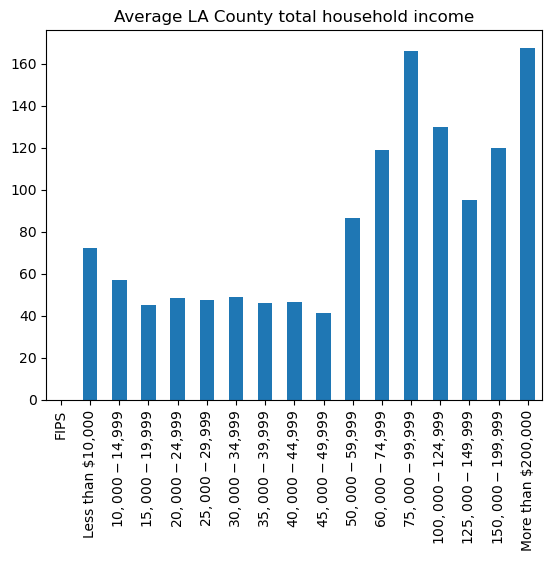

In [152]:
#Average the percentage within each income range and plot
df2.mean().plot.bar(title = "Average LA County total household income")

#### So using df. columns will take us back to our orignal data but will be making a new df folder naming it df3 to make a total household population

In [153]:
df.columns

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_STATE', 'Geo_COUNTY', 'Geo_TRACT',
       'Geo_GEOID', 'Geo_NAME', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [154]:
# Want to create a total households population
df3 = ['Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

#### Trying to make a total population with the df2 data lets see if this works by moving it into the DF3 so pretty much making a new column on DF3 with DF2 for Total POP 

In [155]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_1850/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


FIPS  Less than $10,000  $10,000-$14,999  $15,000-$19,999  \
0  06037101110                 54              126               49   
1  06037101122                 88                0                7   
2  06037101220                 78               82               28   

   $20,000-$24,999  $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  \
0               33               61                6               60   
1               42               50               36                0   
2              102                7               86               43   

   $40,000-$44,999  $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  \
0               85               43              149              105   
1               13                0               37              200   
2               55               36              189               89   

   $75,000-$99,999  $100,000-$124,999  $125,000-$149,999  $150,000-$199,999  \
0              146                210                134                143   
1              158                126                194                168   
2              134                116                 60                140   

   More than $200,000  TotalPop  
0                  90      1494  
1                 253      1372  
2                 112      1357

#### I think it worked 

#### Lets keep going 

#### Yes, it Worked SE_A14001_001 is the household number of respondents by census tract if we match that with the total pop above the data matches 

In [156]:
# Notice that the SE_A14001_001 is household number of resondents by census tract
df3 = pd.read_csv("data/R13291723_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(5)

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  6037101110  Census Tract 1011.10, Los Angeles County, Cali...      ACSSF   
1  6037101122  Census Tract 1011.22, Los Angeles County, Cali...      ACSSF   
2  6037101220  Census Tract 1012.20, Los Angeles County, Cali...      ACSSF   
3  6037101221  Census Tract 1012.21, Los Angeles County, Cali...      ACSSF   
4  6037101222  Census Tract 1012.22, Los Angeles County, Cali...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          4200     NaN         NaN   
1         ca         140            0          4201     NaN         NaN   
2         ca         140            0          4202     NaN         NaN   
3         ca         140            0          4203     NaN         NaN   
4         ca         140            0          4204     NaN         NaN   

   Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
0           NaN          NaN          6          37         NaN        NaN   
1           NaN          NaN          6          37         NaN        NaN   
2           NaN          NaN          6          37         NaN        NaN   
3           NaN          NaN          6          37         NaN        NaN   
4           NaN          NaN          6          37         NaN        NaN   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0     101110         NaN         NaN         NaN           NaN          NaN   
1     101122         NaN         NaN         NaN           NaN          NaN   
2     101220         NaN         NaN         NaN           NaN          NaN   
3     101221         NaN         NaN         NaN           NaN          NaN   
4     101222         NaN         NaN         NaN           NaN          NaN   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
1         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
2         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
3         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
4         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       NaN        NaN         NaN           NaN     NaN       NaN   
1       NaN        NaN         NaN           NaN     NaN       NaN   
2       NaN        NaN         NaN           NaN     NaN       NaN   
3       NaN        NaN         NaN           NaN     NaN       NaN   
4       NaN        NaN         NaN           NaN     NaN       NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
1         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
2         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
3         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
4         NaN       NaN       NaN      NaN        NaN        NaN         NaN   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
2        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
3        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
4        NaN        NaN        NaN     NaN      NaN      NaN      NaN   

   Geo_PUMA5  Geo_PUMA1           Geo_GEOID              Geo_NAME  Geo_BTTR  \
0        NaN        NaN  14000US06037101110  Census Tract 1011.10       NaN   
1        NaN        NaN  14000US06037101122  Census Tract 1011.22       NaN   
2        NaN        NaN  14000US06037101220  Census Tract 1012.20       NaN   
3        

In [161]:
df2.columns

Index(['FIPS', 'Less than $10,000', '$10,000-$14,999', '$15,000-$19,999',
       '$20,000-$24,999', '$25,000-$29,999', '$30,000-$34,999',
       '$35,000-$39,999', '$40,000-$44,999', '$45,000-$49,999',
       '$50,000-$59,999', '$60,000-$74,999', '$75,000-$99,999',
       '$100,000-$124,999', '$125,000-$149,999', '$150,000-$199,999',
       'More than $200,000', 'TotalPop', 'poverty'],
      dtype='object')

#### Creating a poverty Variable will be using less than all the way to $39,999 to map poverty in los Angeles County 

In [ ]:
This is the code how to group the income and labeling it to poverty

In [164]:
# Creating a poverty column variable 
df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] + df2['$25,000-$29,999'] + df2['$30,000-$34,999'] +df2['$35,000-$39,999']
df2.sample(5)

/tmp/ipykernel_1850/1108407727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] + df2['$25,000-$29,999'] + df2['$30,000-$34,999'] +df2['$35,000-$39,999']


FIPS  Less than $10,000  $10,000-$14,999  $15,000-$19,999  \
146   06037119310                100               73               33   
1523  06037480803                115                8               77   
70    06037108203                 14                0                0   
1271  06037404100                  8                0               40   
1372  06037408707                 52               26               70   

      $20,000-$24,999  $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  \
146                68               35               12               63   
1523               60               24               52               59   
70                 42                9               45               19   
1271                9               47               96              159   
1372               30                9               34               55   

      $40,000-$44,999  $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  \
146                71               14               92               68   
1523                7               13               73               27   
70                 63                8               74               15   
1271               49               75              195              180   
1372               36               40               66               81   

      $75,000-$99,999  $100,000-$124,999  $125,000-$149,999  \
146               206                185                 68   
1523               84                240                134   
70                136                166                121   
1271              239                243                 52   
1372              239                454                236   

      $150,000-$199,999  More than $200,000  TotalPop  poverty  
146                  80                  75      1243      384  
1523                150                  83      1206      395  
70                  142                 294      1148      129  
1271                 41                  14      1447      359  
1372                272                 427      2127      276

#### Creating a poverty and total population to get a percent by / with Totalpop
#### On the p_poverty data table that will be our percent 

In [183]:
df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(10)

/tmp/ipykernel_1850/1935856513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100


FIPS  Less than $10,000  $10,000-$14,999  $15,000-$19,999  \
590   06037206303                318              104               59   
217   06037124600                 88               23               39   
1928  06037555002                 66                0               41   
997   06037271801                 65                7                0   
487   06037191810                 23              132               34   
2258  06037701601                 28               10               19   
2379  06037910707                117               16               69   
289   06037132502                117               53               73   
1323  06037407102                 12                0               14   
2318  06037900607                 82               59               62   

      $20,000-$24,999  $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  \
590                 0               34                0                0   
217                 8                0               18               32   
1928                8              129               24               25   
997               142               90              125               80   
487               145               13              145               40   
2258               47               45               27                0   
2379                6               12               28               49   
289               129               62               59               95   
1323               21              129               77               54   
2318               55              110               10               53   

      $40,000-$44,999  $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  \
590                 0               48               66                0   
217                32               57              110              194   
1928               29              153               42              146   
997                42               47              277              102   
487                45               28              153              120   
2258               29               47               82              133   
2379               82               82              182              179   
289                24                8               66              115   
1323               50               57               61              146   
2318               92              121               51              236   

      $75,000-$99,999  $100,000-$124,999  $125,000-$149,999  \
590                 0                  0                  0   
217               131                129                 63   
1928              139                191                106   
997               161                136                 44   
487               171                 86                 11   
2258              154                169                164   
2379              317                131                 43   
289               107                136                 78   
1323              225                123                 70   
2318               97                 68                 84   

      $150,000-$199,999  More than $200,000  TotalPop  poverty  p_poverty  
590                   0                   0       629      515  81.875994  
217                 212                 116      1252      208  16.613419  
1928                 76                  83      1258      293  23.290938  
997                 208                  89      1615      509  31.517028  
487                  80                   0      1226      532  43.393148  
2258                140                 687      1781      176   9.882089  
2379                 92                  53      1458      297  20.370370  
289                  49                  35      1206      588  48.756219  
1323                202                  59      1300      307  23.615385  
2318                 54                   0      1234      431  34.927

#### Using the p_poverty our percent we will plot it on a graph 

<AxesSubplot: ylabel='Frequency'>

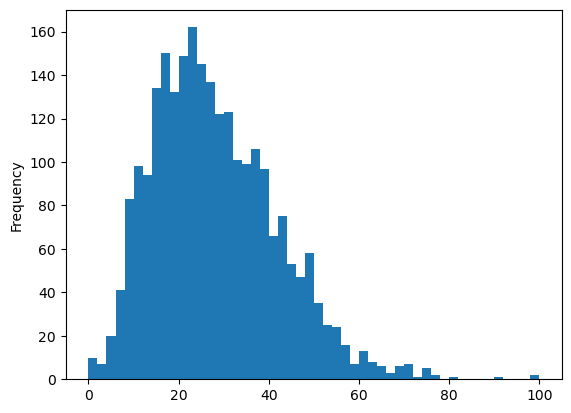

In [184]:
df2['p_poverty'].plot.hist(bins=50)

#### Lets sort the data with the top 10 census household income that live in poverty in LA County. 

In [186]:
# top 10 census of households income that live in poverty. 
df_sorted = df2.sort_values(by='p_poverty',ascending = False)
df_sorted[['FIPS','p_poverty']].head(10)

FIPS   p_poverty
2488  06037980033  100.000000
588   06037206301   98.118532
589   06037206302   91.600634
590   06037206303   81.875994
906   06037242600   76.825633
771   06037224702   76.410999
2469  06037980011   75.000000
754   06037221900   74.597701
902   06037242100   74.523161
1971  06037571600   74.374255

#### Lets use the p_poverty data and plot it with our FIPS 

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Housholds poverty income in Los Angeles'}, xlabel='FIPS'>

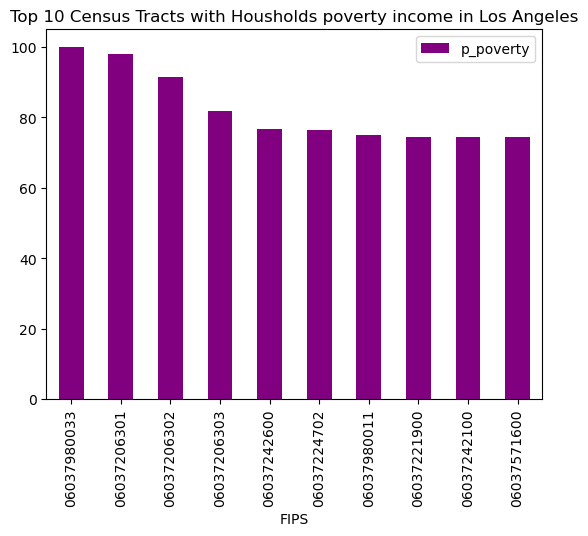

In [192]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='p_poverty',
                            title='Top 10 Census Tracts with Housholds poverty income in Los Angeles',
                            color='Purple')

#### Lets do the same plot but this time lets change the axis just to have options 

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Housholds poverty income in Los Angele'}, ylabel='FIPS'>

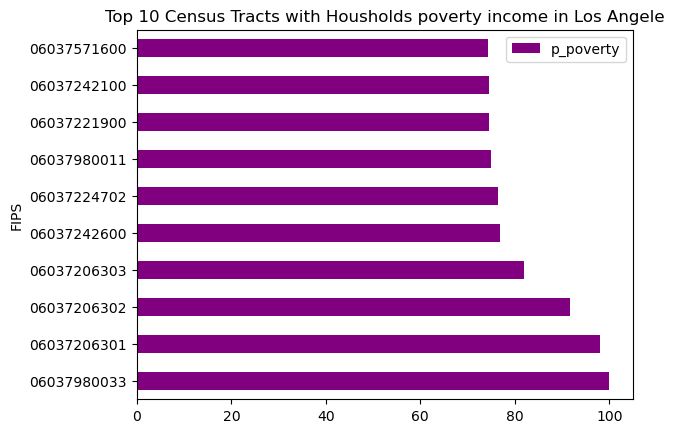

In [187]:
df_sorted.head(10).plot.barh(x='FIPS',  
                            y='p_poverty', 
                            title='Top 10 Census Tracts with Housholds poverty income in Los Angeles',
                            color='Purple')

#### Let show our data in a map 

#### Import geopandas library to visualize data

In [170]:
import geopandas as gpd

#### Lets use a geojson census tract data file to make our mapping easier that has a geometry column

In [207]:
# Import geojson file of LA County
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head(2)

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...

#### Lets create a FIPS column to prepare for merging our data from the geojson

In [208]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

#### Create a new dataframe to merge the geospatial data with the household data

In [209]:
tracts=tracts.merge(df2, on="FIPS")

#### Look at merged dataframe

In [210]:
tracts.head(3)

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   

                                            geometry         FIPS  \
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110   
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122   
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220   

   Less than $10,000  $10,000-$14,999  $15,000-$19,999  $20,000-$24,999  \
0                 54              126               49               33   
1                 88                0                7               42   
2                 78               82               28              102   

   $25,000-$29,999  $30,000-$34,999  $35,000-$39,999  $40,000-$44,999  \
0               61                6               60               85   
1               50               36                0               13   
2                7               86               43               55   

   $45,000-$49,999  $50,000-$59,999  $60,000-$74,999  $75,000-$99,999  \
0               43              149              105              146   
1                0               37              200              158   
2               36              189               89              134   

   $100,000-$124,999  $125,000-$149,999  $150,000-$199,999  \
0                210                134                143   
1                126                194                168   
2                116                 60                140   

   More than $200,000  TotalPop  poverty  p_poverty  
0                  90      1494      389  26.037483  
1                 253      1372      223  16.253644  
2                 112      1357      426  31.392778

#### Lets now plot our data

<AxesSubplot: >

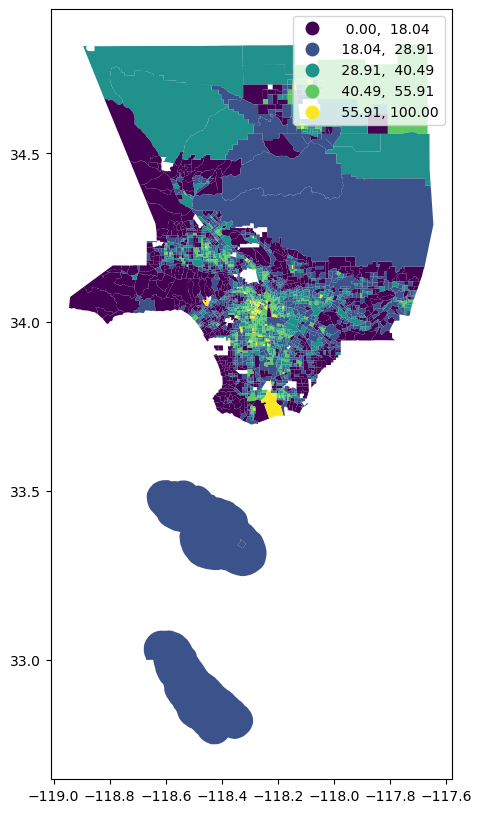

In [212]:
# scheme='NaturalBreaks'
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')

#### Check it out we got a map with data  of people who live in poverty

<AxesSubplot: >

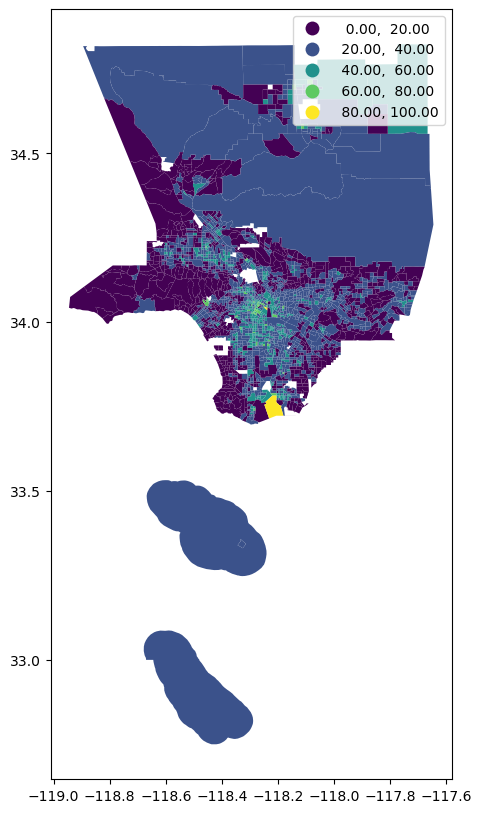

In [176]:
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

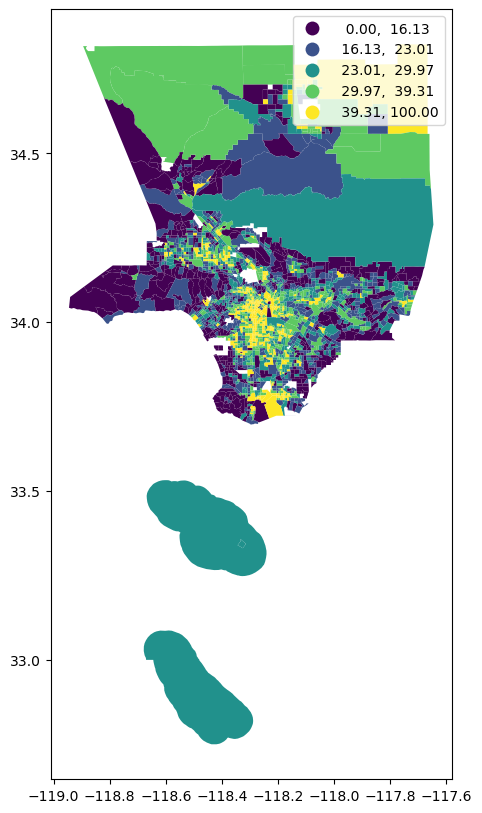

In [177]:
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='quantiles')

# With this code i will do a 6 neighborhood code by neighborhood to map poverty within geofips for the midterm 